Ridge & Lasso Regression Assignment on Housing Prices --------- Submitted by Shashwata Chattopadhyay

# Step 1: Reading & Understanding the Data

In [1]:
# Instructing jupyter to plot all graphs inline (no separate window)
%matplotlib inline

In [2]:
# Inporting the relevant libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Suppress the warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the project data
Data = pd.read_csv("C:/Users/sunny/Downloads/train.csv")

In [5]:
# Display first few rows of the dataset
Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Display the shape of the dataset
Data.shape

(1460, 81)

In [7]:
# Checking the data for null values
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset has 80 columns out of which 43 columns are of "object" datatype while rest are "numeric" datatype (integer or floating point). 
Some of the Object type variables have 'Null' entries. In fact, PoolQC varible has only 7 non-null entries, MiscFeature has only 54 non-null entries while Alley has only 91 non-null entries. Since the total number of entries is 1460, we can say that information provided by the variables within less than 10% non-null entries is insignificant and so we will remove the columns with less than 146 non-null entries (i.e. PoolQC, Alley and MiscFeature) during Data Preparation. 

In [8]:
# Display the statictics of the dataset
Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Step 2: Data Visualization

Linear Regression model can be applied on a dataset if the output variable (in this case house price) is linearly related to atleast one of the predictor variables included in the dataset. To confirm this, we will check the pair-wise correlations first for the independent numeric variables.   

In [9]:
# Making a list of numerical variables from the dataset
numeric_cols = ['LotFrontage','LotArea','OverallQual','OverallCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
               '2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',
                'Fireplaces','GarageCars','GarageArea', '3SsnPorch','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','MasVnrArea',
                'PoolArea','SalePrice']
house_numeric = Data[numeric_cols]
house_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageCars,GarageArea,3SsnPorch,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MasVnrArea,PoolArea,SalePrice
0,65.0,8450,7,5,706,0,150,856,856,854,...,2,548,0,0,61,0,0,196.0,0,208500
1,80.0,9600,6,8,978,0,284,1262,1262,0,...,2,460,0,298,0,0,0,0.0,0,181500
2,68.0,11250,7,5,486,0,434,920,920,866,...,2,608,0,0,42,0,0,162.0,0,223500
3,60.0,9550,7,5,216,0,540,756,961,756,...,3,642,0,0,35,272,0,0.0,0,140000
4,84.0,14260,8,5,655,0,490,1145,1145,1053,...,3,836,0,192,84,0,0,350.0,0,250000


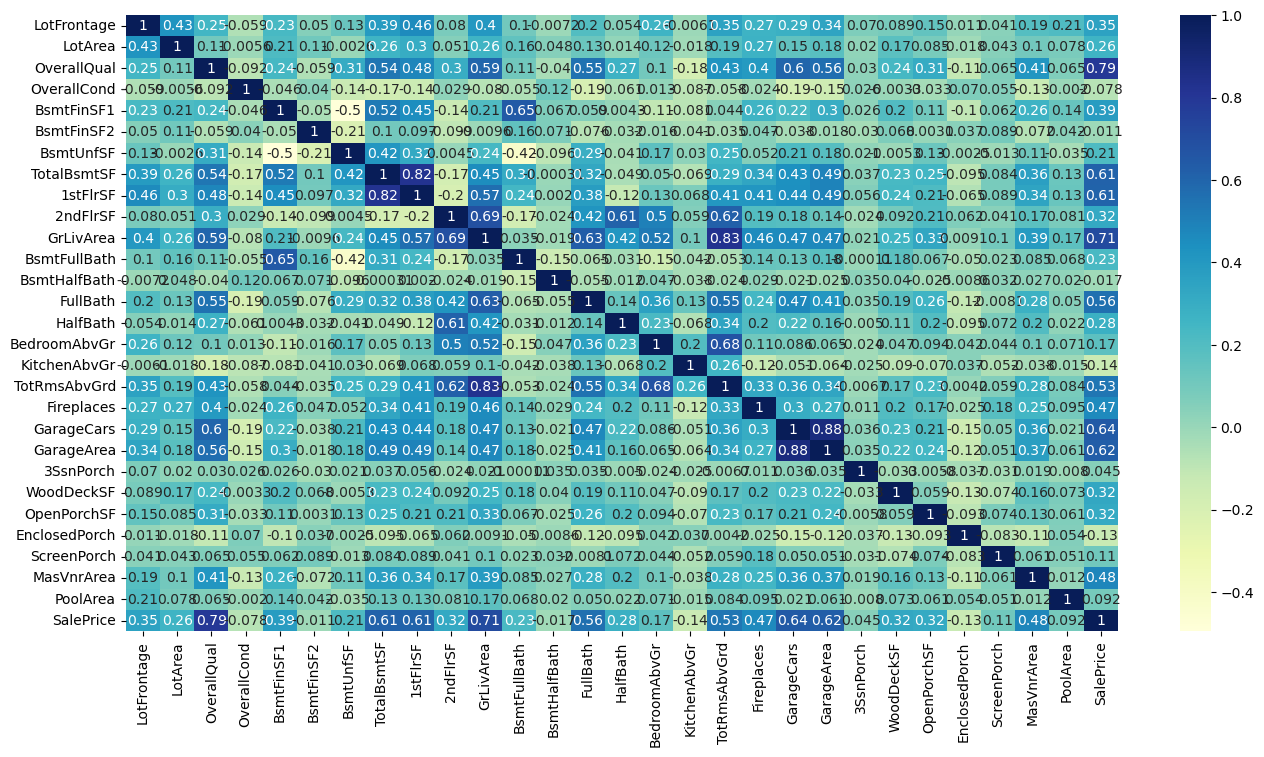

In [10]:
# correlation matrix
cor = house_numeric.corr()
# plotting correlations as a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)  
plt.show()

In above heatmap, the higher positive correlations are blue to dark blue in color. 

Looking at the last row corresponding to SalePrice, we can see that the some of the variables have good positive correlation to SalePrice are: OverallQual,TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageCars, GarageArea etc.

Also there are some strong correlations between the predictor variables, like:
1. TotalBsmtSF and 1stFlrSF (correlation coefficient = 0.82)
2. GrlivArea and TotRmsAvbGrd (correlation coefficient = 0.83)
3. GarageCars and GarageArea (correlation coefficient = 0.88)

In [11]:
# Making a list of categorical variables from the dataset
categorical_cols = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
                'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','SaleType',
                'SaleCondition']
house_categorical = Data[categorical_cols]
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal


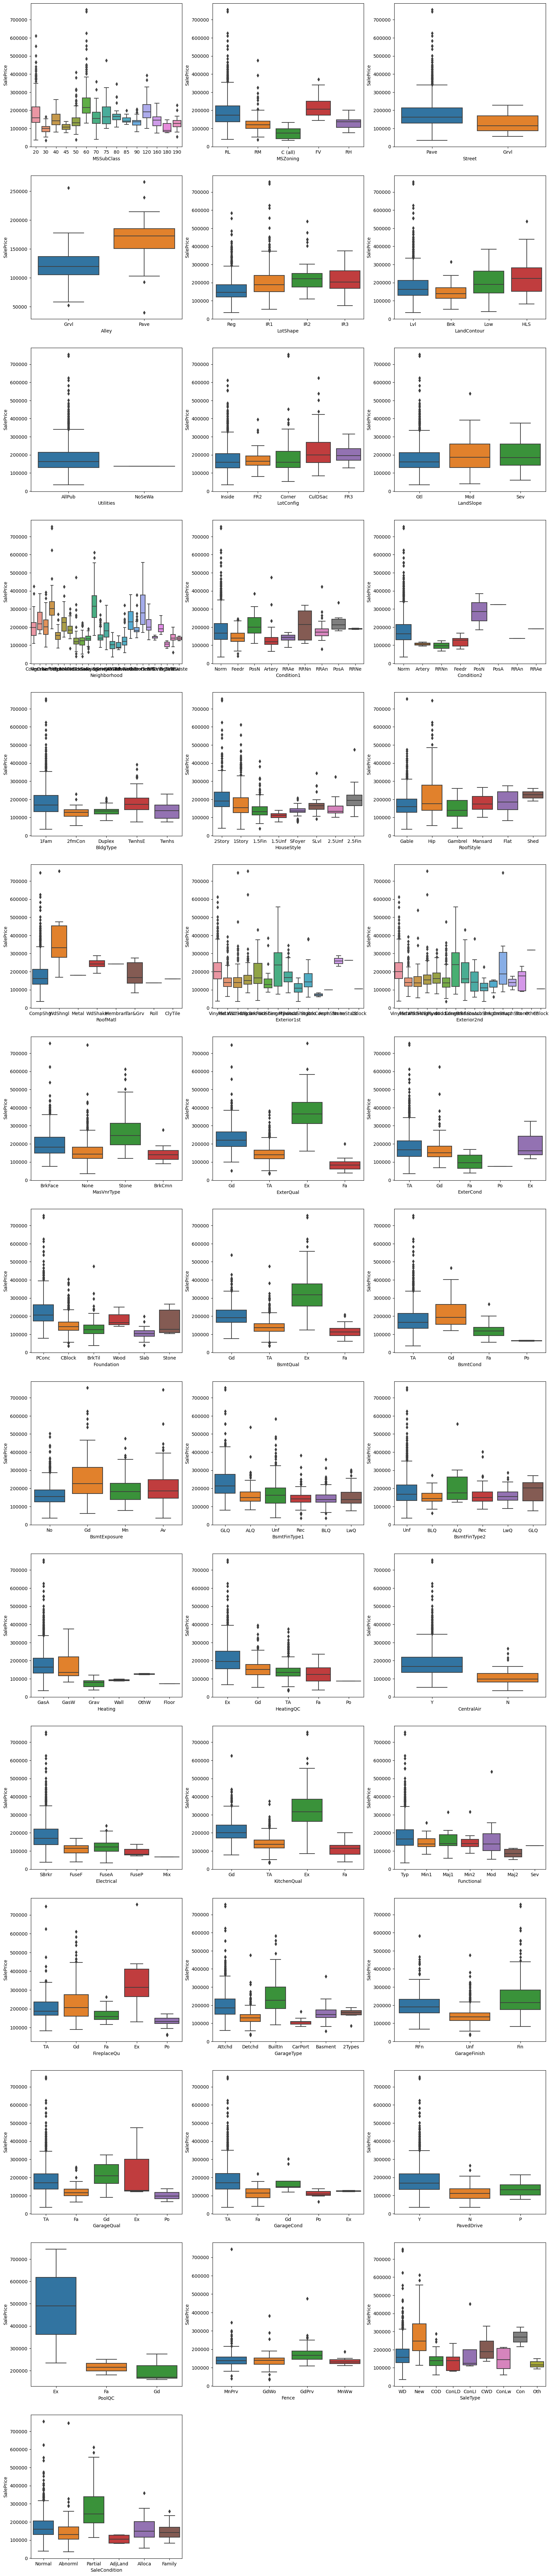

In [12]:
# Displaying boxplots for the categorical variables to check for correlations
plt.figure(figsize=(20, 100))
n_rows = int(len(categorical_cols)/3)+1
for i in range(0,len(categorical_cols)):
    plt.subplot(n_rows,3,i+1)
    sns.boxplot(x = categorical_cols[i], y = 'SalePrice', data = Data)
 

In most of the above plots, there is some variation in the median values for different labels of the Categorical variable, 
so we cannot eliminate those variables. Only variable where the data looks highly biased towards a particular lable is the 
Utilities variable.

In [13]:
# Displaying the values of the Utilities variable
Data['Utilities'].astype('category').value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

As most of the data points are in "AllPub" category and only 1 datapoint in the "NoSeWa" category, this variable does not 
convey any useful information and can be removed from the dataset.

# Step 3: Data Preparation

In [14]:
# Removing the irrelevant column - Id
Data.drop(['Id'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
# Removing the variables having more than 95% Null Values - PoolQC, Alley and MiscFeature
Data.drop(['PoolQC'], axis = 1, inplace = True)
Data.drop(['MiscFeature'], axis = 1, inplace = True)
Data.drop(['Alley'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [16]:
# Removing the variables having high correlations - 1stFlrSF , TotRmsAbvGrd and GarageCars
Data.drop(['1stFlrSF'], axis = 1, inplace = True)
Data.drop(['TotRmsAbvGrd'], axis = 1, inplace = True)
Data.drop(['GarageCars'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Printing the List of columns containing NaN or Null values
null_cols = Data.columns[Data.isna().any()].tolist()
null_cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

LotFrontage is a numerical variable so NaN means missing value. 

In [18]:
Data['LotFrontage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


There are 1201 non-null entries in LotFrontage column, so 1460 - 1201 = 259 columns have NaN entries. 
As 259 is more than 10% of the dataset, so it is better not be replace the NaN values by arbitrary number 
but instead remove the rows from the dataset.

In [19]:
Data.dropna(subset=['LotFrontage'],inplace=True)
# Display the dataset information to confirm the dataset is updated.
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1201 non-null   int64  
 1   MSZoning       1201 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1201 non-null   int64  
 4   Street         1201 non-null   object 
 5   LotShape       1201 non-null   object 
 6   LandContour    1201 non-null   object 
 7   Utilities      1201 non-null   object 
 8   LotConfig      1201 non-null   object 
 9   LandSlope      1201 non-null   object 
 10  Neighborhood   1201 non-null   object 
 11  Condition1     1201 non-null   object 
 12  Condition2     1201 non-null   object 
 13  BldgType       1201 non-null   object 
 14  HouseStyle     1201 non-null   object 
 15  OverallQual    1201 non-null   int64  
 16  OverallCond    1201 non-null   int64  
 17  YearBuilt      1201 non-null   int64  
 18  YearRemo

Next for the categorical variables having missing entries (listed below), we will replace the NaN values by new category 'DataMissing'. 
List: 'MasVnrType',  'BsmtQual',  'BsmtCond',  'BsmtExposure',  'BsmtFinType1',  'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond',  'Fence'.

In [20]:
Data.MasVnrType.fillna('DataMissing', inplace = True)
Data.BsmtQual.fillna('DataMissing', inplace = True)
Data.BsmtCond.fillna('DataMissing', inplace = True)
Data.BsmtExposure.fillna('DataMissing', inplace = True)
Data.BsmtFinType1.fillna('DataMissing', inplace = True)
Data.BsmtFinType2.fillna('DataMissing', inplace = True)
Data.Electrical.fillna('DataMissing', inplace = True)
Data.FireplaceQu.fillna('DataMissing', inplace = True)
Data.GarageType.fillna('DataMissing', inplace = True)
Data.GarageFinish.fillna('DataMissing', inplace = True)
Data.GarageQual.fillna('DataMissing', inplace = True)
Data.GarageCond.fillna('DataMissing', inplace = True)
Data.Fence.fillna('DataMissing', inplace = True)

In [21]:
# Display the dataset information to confirm that the NaN values have been replaced.
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1201 non-null   int64  
 1   MSZoning       1201 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1201 non-null   int64  
 4   Street         1201 non-null   object 
 5   LotShape       1201 non-null   object 
 6   LandContour    1201 non-null   object 
 7   Utilities      1201 non-null   object 
 8   LotConfig      1201 non-null   object 
 9   LandSlope      1201 non-null   object 
 10  Neighborhood   1201 non-null   object 
 11  Condition1     1201 non-null   object 
 12  Condition2     1201 non-null   object 
 13  BldgType       1201 non-null   object 
 14  HouseStyle     1201 non-null   object 
 15  OverallQual    1201 non-null   int64  
 16  OverallCond    1201 non-null   int64  
 17  YearBuilt      1201 non-null   int64  
 18  YearRemo

In [22]:
# Printing the List of columns containing NaN or Null values
null_cols = Data.columns[Data.isna().any()].tolist()
null_cols

['MasVnrArea', 'GarageYrBlt']

For the NaN values of MasVnrArea, the number of such values is very less (1201 - 1195 = 6), 
so we can just replace these NaN values by 0.

In [23]:
Data.MasVnrArea.fillna(0, inplace = True)
# Display the dataset information to confirm that the NaN values have been replaced.
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1201 non-null   int64  
 1   MSZoning       1201 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1201 non-null   int64  
 4   Street         1201 non-null   object 
 5   LotShape       1201 non-null   object 
 6   LandContour    1201 non-null   object 
 7   Utilities      1201 non-null   object 
 8   LotConfig      1201 non-null   object 
 9   LandSlope      1201 non-null   object 
 10  Neighborhood   1201 non-null   object 
 11  Condition1     1201 non-null   object 
 12  Condition2     1201 non-null   object 
 13  BldgType       1201 non-null   object 
 14  HouseStyle     1201 non-null   object 
 15  OverallQual    1201 non-null   int64  
 16  OverallCond    1201 non-null   int64  
 17  YearBuilt      1201 non-null   int64  
 18  YearRemo

For the NaN entries in the GarageYrBlt column, we can remove the affected rows as the rows affected is low.

In [24]:
Data.dropna(subset=['GarageYrBlt'],inplace=True)
# Display the dataset information to confirm the dataset is updated.
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1127 non-null   int64  
 1   MSZoning       1127 non-null   object 
 2   LotFrontage    1127 non-null   float64
 3   LotArea        1127 non-null   int64  
 4   Street         1127 non-null   object 
 5   LotShape       1127 non-null   object 
 6   LandContour    1127 non-null   object 
 7   Utilities      1127 non-null   object 
 8   LotConfig      1127 non-null   object 
 9   LandSlope      1127 non-null   object 
 10  Neighborhood   1127 non-null   object 
 11  Condition1     1127 non-null   object 
 12  Condition2     1127 non-null   object 
 13  BldgType       1127 non-null   object 
 14  HouseStyle     1127 non-null   object 
 15  OverallQual    1127 non-null   int64  
 16  OverallCond    1127 non-null   int64  
 17  YearBuilt      1127 non-null   int64  
 18  YearRemo

In [25]:
# generating DUMMY variables for categorical variable 'MSZoning'
status = pd.get_dummies(Data['MSZoning'], prefix='MSZoning', drop_first = True)
status

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,1,0
1457,0,0,1,0
1458,0,0,1,0


In [26]:
# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['MSZoning'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,2,2008,WD,Normal,208500,0,0,1,0
1,20,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,5,2007,WD,Normal,181500,0,0,1,0
2,60,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,9,2008,WD,Normal,223500,0,0,1,0
3,70,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,2,2006,WD,Abnorml,140000,0,0,1,0
4,60,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,12,2008,WD,Normal,250000,0,0,1,0


In [27]:
# generating DUMMY variables for categorical variable 'MSSubClass'
status = pd.get_dummies(Data['MSSubClass'], prefix='MSSubClass', drop_first = True)
status

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['MSSubClass'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,1,0,0,0,0,0,0,0,0,0


In [29]:
 # generating DUMMY variables for categorical variable 'Street'
status = pd.get_dummies(Data['Street'], prefix='Street', drop_first = True)
status

,Street_Pave
0,1
1,1
2,1
3,1
4,1
...,...
1455,1
1456,1
1457,1
1458,1


In [30]:
# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Street'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave
0,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,0,0,0,0,1
1,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1,0,0,0,0,0,0,0,0,1
4,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,0,0,0,0,0,0,0,0,0,1


In [31]:
 # generating DUMMY variables for categorical variable 'LotShape'
status = pd.get_dummies(Data['LotShape'], prefix='LotShape')
status

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,0,1


In [32]:
# Dropping the column of Regular shape so that only the Irregular shape columns are included in model as predictor variables (and Regular shape becomes default case)
status.drop('LotShape_Reg', axis=1, inplace = True)
status

,LotShape_IR1,LotShape_IR2,LotShape_IR3
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1455,0,0,0
1456,0,0,0
1457,0,0,0
1458,0,0,0


In [33]:
# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['LotShape'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3
0,65.0,8450,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,0
1,80.0,9600,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,1,0,0
3,60.0,9550,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,1,0,0
4,84.0,14260,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,0,0,0,0,0,0,1,1,0,0


In [34]:
# generating DUMMY variables for categorical variable 'Alley'
status = pd.get_dummies(Data['LandContour'], prefix='LandContour', drop_first = True)
status

,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1455,0,0,1
1456,0,0,1
1457,0,0,1
1458,0,0,1


In [35]:
# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['LandContour'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,0,0,1,0,0,0,0,0,1
1,80.0,9600,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,0,0,0,1,0,0,0,0,0,1
2,68.0,11250,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,0,0,0,1,1,0,0,0,0,1
3,60.0,9550,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,0,0,0,1,1,0,0,0,0,1
4,84.0,14260,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,0,0,0,1,1,0,0,0,0,1


In [36]:
# generating DUMMY variables for categorical variable 'Utilities'
status = pd.get_dummies(Data['Utilities'], prefix='Utilities', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Utilities'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,65.0,8450,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,0,1,0,0,0,0,0,1
1,80.0,9600,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,0,0,0,1,0,0,0,0,0,1
2,68.0,11250,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,0,1,1,0,0,0,0,1
3,60.0,9550,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,0,0,0,1,1,0,0,0,0,1
4,84.0,14260,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,0,0,0,1,1,0,0,0,0,1


In [37]:
# generating DUMMY variables for categorical variable 'LotConfig'
status = pd.get_dummies(Data['LotConfig'], prefix='LotConfig', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['LotConfig'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,65.0,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
1,80.0,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,1,0,0,0,0,1,0,0,0,1
3,60.0,9550,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,...,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,...,1,0,0,0,0,1,0,1,0,0


In [38]:
# generating DUMMY variables for categorical variable 'LandSlope'
status = pd.get_dummies(Data['LandSlope'], prefix='LandSlope', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['LandSlope'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,LotShape_IR3,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev
0,65.0,8450,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,...,0,0,0,1,0,0,0,1,0,0
1,80.0,9600,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,...,0,0,0,1,0,0,0,1,0,0
3,60.0,9550,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,...,0,0,0,1,0,1,0,0,0,0


In [39]:
# generating DUMMY variables for categorical variable 'Neighborhood'
status = pd.get_dummies(Data['Neighborhood'], prefix='Neighborhood', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Neighborhood'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,65.0,8450,Norm,Norm,1Fam,2Story,7,5,2003,2003,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,Feedr,Norm,1Fam,1Story,6,8,1976,1976,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,Norm,Norm,1Fam,2Story,7,5,2001,2002,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,Norm,Norm,1Fam,2Story,7,5,1915,1970,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,Norm,Norm,1Fam,2Story,8,5,2000,2000,...,1,0,0,0,0,0,0,0,0,0


In [40]:
# generating DUMMY variables for categorical variable 'Condition1'
status = pd.get_dummies(Data['Condition1'], prefix='Condition1')
status.drop('Condition1_Norm', axis=1, inplace = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Condition1'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,...,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
0,65.0,8450,Norm,1Fam,2Story,7,5,2003,2003,Gable,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,Norm,1Fam,1Story,6,8,1976,1976,Gable,...,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,Norm,1Fam,2Story,7,5,2001,2002,Gable,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,Norm,1Fam,2Story,7,5,1915,1970,Gable,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,Norm,1Fam,2Story,8,5,2000,2000,Gable,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# generating DUMMY variables for categorical variable 'Condition2'
status = pd.get_dummies(Data['Condition2'], prefix='Condition2')
status.drop('Condition2_Norm', axis=1, inplace = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Condition2'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRNn
0,65.0,8450,1Fam,2Story,7,5,2003,2003,Gable,CompShg,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Fam,1Story,6,8,1976,1976,Gable,CompShg,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,1Fam,2Story,7,5,2001,2002,Gable,CompShg,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,1Fam,2Story,7,5,1915,1970,Gable,CompShg,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,1Fam,2Story,8,5,2000,2000,Gable,CompShg,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# generating DUMMY variables for categorical variable 'BldgType'
status = pd.get_dummies(Data['BldgType'], prefix='BldgType', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['BldgType'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,...,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,...,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# generating DUMMY variables for categorical variable 'HouseStyle'
status = pd.get_dummies(Data['HouseStyle'], prefix='HouseStyle', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['HouseStyle'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,0,0,0,0,0,0,0,1,0,0


In [44]:
# Since the age of the building may influence the price, we will derive 2 variables - the actual age and the age after renovation
Data['BldgAge'] = 2024 - Data['YearBuilt']
Data['BldgRenovAge'] = 2024 - Data['YearRemodAdd'] 
Data.drop(['YearBuilt'], axis = 1, inplace = True)
Data.drop(['YearRemodAdd'], axis = 1, inplace = True)
# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,...,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BldgAge,BldgRenovAge
0,65.0,8450,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,...,0,0,0,0,0,1,0,0,21,21
1,80.0,9600,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,...,0,0,1,0,0,0,0,0,48,48
2,68.0,11250,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,...,0,0,0,0,0,1,0,0,23,22
3,60.0,9550,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,...,0,0,0,0,0,1,0,0,109,54
4,84.0,14260,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,...,0,0,0,0,0,1,0,0,24,24


In [45]:
# generating DUMMY variables for categorical variable 'RoofStyle'
status = pd.get_dummies(Data['RoofStyle'], prefix='RoofStyle', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['RoofStyle'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,BldgAge,BldgRenovAge,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard
0,65.0,8450,7,5,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,0,1,0,0,21,21,1,0,0,0
1,80.0,9600,6,8,CompShg,MetalSd,MetalSd,None,0.0,TA,...,0,0,0,0,48,48,1,0,0,0
2,68.0,11250,7,5,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,0,1,0,0,23,22,1,0,0,0
3,60.0,9550,7,5,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,0,1,0,0,109,54,1,0,0,0
4,84.0,14260,8,5,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,0,1,0,0,24,24,1,0,0,0


In [46]:
# generating DUMMY variables for categorical variable 'RoofMatl'
status = pd.get_dummies(Data['RoofMatl'], prefix='RoofMatl', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['RoofMatl'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,...,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
0,65.0,8450,7,5,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,1,0,0,0,1,0,0,0,0,0
1,80.0,9600,6,8,MetalSd,MetalSd,None,0.0,TA,TA,...,1,0,0,0,1,0,0,0,0,0
2,68.0,11250,7,5,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,1,0,0,0,1,0,0,0,0,0
3,60.0,9550,7,5,Wd Sdng,Wd Shng,None,0.0,TA,TA,...,1,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,1,0,0,0,1,0,0,0,0,0


In [47]:
# generating DUMMY variables for categorical variable 'Exterior1st'
status = pd.get_dummies(Data['Exterior1st'], prefix='Exterior1st', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Exterior1st'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,65.0,8450,7,5,VinylSd,BrkFace,196.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,MetalSd,None,0.0,TA,TA,CBlock,...,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,7,5,VinylSd,BrkFace,162.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,Wd Shng,None,0.0,TA,TA,BrkTil,...,0,0,0,0,0,0,0,0,1,0
4,84.0,14260,8,5,VinylSd,BrkFace,350.0,Gd,TA,PConc,...,0,0,0,0,0,0,0,1,0,0


In [48]:
# generating DUMMY variables for categorical variable 'Exterior2nd'
status = pd.get_dummies(Data['Exterior2nd'], prefix='Exterior2nd', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Exterior2nd'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,65.0,8450,7,5,BrkFace,196.0,Gd,TA,PConc,Gd,...,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,6,8,None,0.0,TA,TA,CBlock,Gd,...,0,0,1,0,0,0,0,0,0,0
2,68.0,11250,7,5,BrkFace,162.0,Gd,TA,PConc,Gd,...,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,7,5,None,0.0,TA,TA,BrkTil,TA,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,BrkFace,350.0,Gd,TA,PConc,Gd,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# generating DUMMY variables for categorical variable 'MasVnrType'
status = pd.get_dummies(Data['MasVnrType'], prefix='MasVnrType', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['MasVnrType'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,...,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_DataMissing,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,7,5,196.0,Gd,TA,PConc,Gd,TA,...,0,0,0,1,0,0,1,0,0,0
1,80.0,9600,6,8,0.0,TA,TA,CBlock,Gd,TA,...,0,0,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,162.0,Gd,TA,PConc,Gd,TA,...,0,0,0,1,0,0,1,0,0,0
3,60.0,9550,7,5,0.0,TA,TA,BrkTil,TA,Gd,...,0,0,0,0,0,1,0,0,1,0
4,84.0,14260,8,5,350.0,Gd,TA,PConc,Gd,TA,...,0,0,0,1,0,0,1,0,0,0


In [50]:
# generating DUMMY variables for categorical variable 'ExterQual'
status = pd.get_dummies(Data['ExterQual'], prefix='ExterQual', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['ExterQual'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_DataMissing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,65.0,8450,7,5,196.0,TA,PConc,Gd,TA,No,...,1,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,0.0,TA,CBlock,Gd,TA,Gd,...,0,0,0,0,0,1,0,0,0,1
2,68.0,11250,7,5,162.0,TA,PConc,Gd,TA,Mn,...,1,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,0.0,TA,BrkTil,TA,Gd,No,...,0,0,1,0,0,1,0,0,0,1
4,84.0,14260,8,5,350.0,TA,PConc,Gd,TA,Av,...,1,0,0,1,0,0,0,0,1,0


In [51]:
# generating DUMMY variables for categorical variable 'ExterCond'
status = pd.get_dummies(Data['ExterCond'], prefix='ExterCond', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['ExterCond'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,MasVnrType_BrkFace,MasVnrType_DataMissing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA
0,65.0,8450,7,5,196.0,PConc,Gd,TA,No,GLQ,...,1,0,0,0,0,1,0,0,0,1
1,80.0,9600,6,8,0.0,CBlock,Gd,TA,Gd,ALQ,...,0,0,1,0,0,0,1,0,0,1
2,68.0,11250,7,5,162.0,PConc,Gd,TA,Mn,GLQ,...,1,0,0,0,0,1,0,0,0,1
3,60.0,9550,7,5,0.0,BrkTil,TA,Gd,No,ALQ,...,0,0,1,0,0,0,1,0,0,1
4,84.0,14260,8,5,350.0,PConc,Gd,TA,Av,GLQ,...,1,0,0,0,0,1,0,0,0,1


In [52]:
# generating DUMMY variables for categorical variable 'Foundation'
status = pd.get_dummies(Data['Foundation'], prefix='Foundation', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Foundation'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,...,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,65.0,8450,7,5,196.0,Gd,TA,No,GLQ,706,...,1,0,0,0,1,0,1,0,0,0
1,80.0,9600,6,8,0.0,Gd,TA,Gd,ALQ,978,...,0,1,0,0,1,1,0,0,0,0
2,68.0,11250,7,5,162.0,Gd,TA,Mn,GLQ,486,...,1,0,0,0,1,0,1,0,0,0
3,60.0,9550,7,5,0.0,TA,Gd,No,ALQ,216,...,0,1,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,Gd,TA,Av,GLQ,655,...,1,0,0,0,1,0,1,0,0,0


In [53]:
# generating DUMMY variables for categorical variable 'BsmtQual'
status = pd.get_dummies(Data['BsmtQual'], prefix='BsmtQual', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['BsmtQual'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,65.0,8450,7,5,196.0,TA,No,GLQ,706,Unf,...,1,0,1,0,0,0,0,0,1,0
1,80.0,9600,6,8,0.0,TA,Gd,ALQ,978,Unf,...,1,1,0,0,0,0,0,0,1,0
2,68.0,11250,7,5,162.0,TA,Mn,GLQ,486,Unf,...,1,0,1,0,0,0,0,0,1,0
3,60.0,9550,7,5,0.0,Gd,No,ALQ,216,Unf,...,1,0,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,TA,Av,GLQ,655,Unf,...,1,0,1,0,0,0,0,0,1,0


In [54]:
# generating DUMMY variables for categorical variable 'BsmtCond'
status = pd.get_dummies(Data['BsmtCond'], prefix='BsmtCond', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['BsmtCond'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA
0,65.0,8450,7,5,196.0,No,GLQ,706,Unf,0,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,6,8,0.0,Gd,ALQ,978,Unf,0,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,7,5,162.0,Mn,GLQ,486,Unf,0,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,7,5,0.0,No,ALQ,216,Unf,0,...,0,0,0,0,0,1,0,1,0,0
4,84.0,14260,8,5,350.0,Av,GLQ,655,Unf,0,...,0,0,0,0,1,0,0,0,0,1


In [55]:
# generating DUMMY variables for categorical variable 'BsmtExposure'
status = pd.get_dummies(Data['BsmtExposure'], prefix='BsmtExposure', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['BsmtExposure'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,...,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_DataMissing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,65.0,8450,7,5,196.0,GLQ,706,Unf,0,150,...,1,0,0,0,0,1,0,0,0,1
1,80.0,9600,6,8,0.0,ALQ,978,Unf,0,284,...,1,0,0,0,0,1,0,1,0,0
2,68.0,11250,7,5,162.0,GLQ,486,Unf,0,434,...,1,0,0,0,0,1,0,0,1,0
3,60.0,9550,7,5,0.0,ALQ,216,Unf,0,540,...,0,1,0,1,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,GLQ,655,Unf,0,490,...,1,0,0,0,0,1,0,0,0,0


In [56]:
# generating DUMMY variables for categorical variable 'BsmtFinType1'
status = pd.get_dummies(Data['BsmtFinType1'], prefix='BsmtFinType1', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['BsmtFinType1'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtExposure_DataMissing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_DataMissing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
0,65.0,8450,7,5,196.0,706,Unf,0,150,856,...,0,0,0,1,0,0,1,0,0,0
1,80.0,9600,6,8,0.0,978,Unf,0,284,1262,...,0,1,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,162.0,486,Unf,0,434,920,...,0,0,1,0,0,0,1,0,0,0
3,60.0,9550,7,5,0.0,216,Unf,0,540,756,...,0,0,0,1,0,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,Unf,0,490,1145,...,0,0,0,0,0,0,1,0,0,0


In [57]:
# generating DUMMY variables for categorical variable 'BsmtFinType2'
status = pd.get_dummies(Data['BsmtFinType2'], prefix='BsmtFinType2', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['BsmtFinType2'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_DataMissing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,65.0,8450,7,5,196.0,706,0,150,856,GasA,...,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,GasA,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,GasA,...,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,GasA,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,GasA,...,1,0,0,0,0,0,0,0,0,1


In [58]:
# generating DUMMY variables for categorical variable 'Heating'
status = pd.get_dummies(Data['Heating'], prefix='Heating', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Heating'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,...,BsmtFinType2_BLQ,BsmtFinType2_DataMissing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,65.0,8450,7,5,196.0,706,0,150,856,Ex,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,Ex,...,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,7,5,162.0,486,0,434,920,Ex,...,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,7,5,0.0,216,0,540,756,Gd,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,Ex,...,0,0,0,0,0,1,0,0,0,0


In [59]:
# generating DUMMY variables for categorical variable 'HeatingQC'
status = pd.get_dummies(Data['HeatingQC'], prefix='HeatingQC', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['HeatingQC'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,65.0,8450,7,5,196.0,706,0,150,856,Y,...,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,Y,...,0,1,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,162.0,486,0,434,920,Y,...,0,1,0,0,0,0,0,0,0,0
3,60.0,9550,7,5,0.0,216,0,540,756,Y,...,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,Y,...,0,1,0,0,0,0,0,0,0,0


In [60]:
# generating DUMMY variables for categorical variable 'CentralAir'
status = pd.get_dummies(Data['CentralAir'], prefix='CentralAir', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['CentralAir'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,...,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y
0,65.0,8450,7,5,196.0,706,0,150,856,SBrkr,...,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,SBrkr,...,1,0,0,0,0,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,SBrkr,...,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,SBrkr,...,1,0,0,0,0,0,1,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,SBrkr,...,1,0,0,0,0,0,0,0,0,1


In [61]:
# generating DUMMY variables for categorical variable 'Electrical'
status = pd.get_dummies(Data['Electrical'], prefix='Electrical', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Electrical'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,1,0,0,1,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,1,0,0,0,0,1


In [62]:
# generating DUMMY variables for categorical variable 'KitchenQual'
status = pd.get_dummies(Data['KitchenQual'], prefix='KitchenQual', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['KitchenQual'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,1,0,0,0,0,1,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,1,0,0,0,0,1,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,1,0,0,0,0,1,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,1,0,0,0,0,1,0,1,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,1,0,0,0,0,1,0,1,0


In [63]:

# generating DUMMY variables for categorical variable 'Functional'
status = pd.get_dummies(Data['Functional'], prefix='Functional', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Functional'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,1,0,1,0,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,1,0,0,1,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,1,0,1,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,1,0,1,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,1,0,1,0,0,0,0,0,1


In [64]:
# generating DUMMY variables for categorical variable 'FireplaceQu'
status = pd.get_dummies(Data['FireplaceQu'], prefix='FireplaceQu', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['FireplaceQu'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,1,0,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,0,0,0,1,0,0,1,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,1,0,0,0,0,1


In [65]:
# generating DUMMY variables for categorical variable 'GarageType'
status = pd.get_dummies(Data['GarageType'], prefix='GarageType', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['GarageType'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,1,1,0,0,0,0
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,1,1,0,0,0,0
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,0,1,0,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,1,1,0,0,0,0


In [66]:
# generating DUMMY variables for categorical variable 'GarageFinish'
status = pd.get_dummies(Data['GarageFinish'], prefix='GarageFinish', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['GarageFinish'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,1,1,0,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,1,1,0,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,1,0,0,0,0,0,0,1,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,1,1,0,0,0,0,1,0


In [67]:
# generating DUMMY variables for categorical variable 'GarageQual'
status = pd.get_dummies(Data['GarageQual'], prefix='GarageQual', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['GarageQual'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,1,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,1,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,1,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,0,0,1,0,1,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,1,0,0,0,0,1


In [68]:
# generating DUMMY variables for categorical variable 'GarageCond'
status = pd.get_dummies(Data['GarageCond'], prefix='GarageCond', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['GarageCond'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,1,0,0,0,0,1,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,1,0,0,0,0,1,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,1,0,0,0,0,1,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,1,0,0,0,1,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,1,0,0,0,0,1,0,0,0,1


In [69]:

# generating DUMMY variables for categorical variable 'PavedDrive'
status = pd.get_dummies(Data['PavedDrive'], prefix='PavedDrive', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['PavedDrive'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,1,0,0,0,1,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,1,0,0,0,1,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,1,0,0,0,1,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,0,0,1,0,0,0,1,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,1,0,0,0,1,0,1


In [70]:
# generating DUMMY variables for categorical variable 'Fence'
status = pd.get_dummies(Data['Fence'], prefix='Fence', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['Fence'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,1,0,1,0,0,0,0
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,1,0,1,0,0,0,0
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,1,0,1,0,0,0,0
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,0,0,1,0,1,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,1,0,1,0,0,0,0


In [71]:
# generating DUMMY variables for categorical variable 'SaleType'
status = pd.get_dummies(Data['SaleType'], prefix='SaleType', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['SaleType'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,Fence_MnPrv,Fence_MnWw,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,0,0,0,0,0,1
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,0,0,0,0,0,0,0,0,1
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,0,0,0,0,0,1


In [72]:
# generating DUMMY variables for categorical variable 'SaleCondition'
status = pd.get_dummies(Data['SaleCondition'], prefix='SaleCondition', drop_first = True)

# Adding the DUMMY variables to the dataset and removing the original categorical variable
Data = pd.concat([Data, status], axis = 1)
Data.drop(['SaleCondition'], axis = 1, inplace = True)

# Displaying the first few lines of the revised dataset
Data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,706,0,150,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,978,0,284,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,486,0,434,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,216,0,540,756,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,655,0,490,1145,1053,...,0,0,0,0,1,0,0,0,1,0


In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1459
Columns: 250 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(30), uint8(217)
memory usage: 538.2 KB


In [74]:
# Splitting the data into train and test objects
from sklearn.model_selection import train_test_split
np.random.seed(0)
Data_train, Data_test = train_test_split(Data, train_size = 0.7, test_size = 0.3, random_state = 100)
print(Data_train.shape)
print(Data_test.shape)

(788, 250)
(339, 250)


In [75]:
# Splitting the Data into Predictor variables (X) and predicted variable (y)
X_train = Data_train.drop(['SalePrice'], axis=1)
y_train = Data_train['SalePrice']

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
# scaling the features - necessary before using Ridge or Lasso
cols = X_train.columns
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = cols
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=249)

In [78]:
# Displaying the statistics of the scaled dataset to confirm proper scaling of data
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.133562,0.078719,0.625,0.333333,0.057500,0.000000,0.0,0.346493,0.122095,0.433898,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.140411,0.092951,0.500,0.333333,0.000000,0.000000,0.0,0.442638,0.155974,0.336077,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.113014,0.074361,0.500,0.500000,0.000000,0.097626,0.0,0.056201,0.109984,0.325424,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.061644,0.056463,0.750,0.333333,0.000000,0.209072,0.0,0.192754,0.261047,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.181507,0.091897,0.500,0.666667,0.126875,0.037030,0.0,0.215049,0.109984,0.352542,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Model Building and Evaluation

## Ridge Regression Model

In [79]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 41 candidates, totalling 205 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [81]:
# Further Fine tuning the value of alpha 
params = {'alpha': [4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9]}

ridge = Ridge()

# cross validation
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
{'alpha': 5.4}


In [83]:
#Fitting Ridge model for alpha = 5.4 and printing coefficients which have been penalised
alpha = 5.4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.11942731e+03  1.90215129e+04  5.15404614e+04  2.35147083e+04
  2.58024519e+04  8.85109029e+03  9.93199733e+02  2.55220395e+04
  1.73525107e+04  5.00495597e+04  3.42532953e+02  5.43664922e+04
  1.28877534e+04 -7.28225983e+02  4.37852148e+04  1.59493337e+04
  1.43369443e+04 -1.25163678e+04  1.28041007e+04 -1.88306236e+03
  3.22872453e+04  2.09496513e+04  3.90991507e+03 -8.55382909e+03
  1.06706724e+04  6.46235139e+03  8.36752490e+03 -2.91827753e+03
  2.03393566e+03 -6.62079063e+03  6.61593250e+03 -1.40804137e+03
  1.05115678e+04  3.85199418e+03 -2.28691247e+03 -3.44540167e+03
  2.04438701e+03  7.32340639e+02  3.01143944e+03  7.48955883e+03
  1.52990983e+03  6.90050122e+02 -1.18362979e+03 -5.29177820e+03
 -1.06268095e+04 -1.10082482e+04 -4.92052056e+03 -4.28590076e+03
  1.48706058e+04  3.35198717e+03  4.39920256e+03 -2.37593145e+04
  8.32709916e+03 -4.70941329e+03  9.64434553e+03  2.13078003e+04
 -7.58691091e+03 -4.36779415e+03 -2.58323546e+03  8.34573579e+03
 -5.03414047e+03  0.00000

In [84]:
# Calculation of R2 score, Residual Sum of Squares and Root Mean Square Error for the TRAINING data 
y_pred_train = ridge.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
print("RIDGE PERFORMANCE SCORES ON TRAINING DATA:")
print("R2 score: ", r2)

rss = np.sum(np.square(y_train - y_pred_train))
print("RSS: ",rss)

mse = mean_squared_error(y_train, y_pred_train)
print("RMSE: ",mse**0.5)

RIDGE PERFORMANCE SCORES ON TRAINING DATA:
R2 score:  0.899504172369242
RSS:  544871283208.92566
RMSE:  26295.64639442558


#### Checking the Ridge model performance on the Test data

In [85]:
# Splitting the Test Data into Predictor variables (X_test) and predicted variable (y_test)
X_test = Data_test.drop(['SalePrice'], axis=1)
y_test = Data_test['SalePrice']

In [86]:
# scaling the features - necessary before using Ridge or Lasso
cols = X_test.columns
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = cols
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.202055,0.112190,0.375,0.666667,0.00000,0.085046,0.415262,0.050163,0.172831,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.133562,0.082602,0.375,0.666667,0.00000,0.111977,0.000000,0.068741,0.127660,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.133562,0.117242,0.375,0.666667,0.00000,0.000000,0.000000,0.122620,0.043208,0.321550,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.181507,0.125989,0.125,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.373288,0.557373,1.000,0.333333,0.47625,0.400425,0.000000,0.407803,0.513584,0.744794,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
# Calculation of R2 score, Residual Sum of Squares and Root Mean Square Error for the Test Data  
y_pred_test = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
print("RIDGE PERFORMANCE SCORES ON TEST DATA: ")
print("R2 score: ", r2)

rss = np.sum(np.square(y_test - y_pred_test))
print("RSS: ",rss)

mse = mean_squared_error(y_test, y_pred_test)
print("RMSE: ",mse**0.5)

RIDGE PERFORMANCE SCORES ON TEST DATA: 
R2 score:  0.8104772139490107
RSS:  449499540101.61304
RMSE:  36413.69722278262


## Lasso Regression Model

In [88]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000 ]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 41 candidates, totalling 205 fits
{'alpha': 200}


In [90]:
# Fine tuning the value of alpha

params = {'alpha': [110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
{'alpha': 160}


In [91]:
# Further Fine tuning the value of alpha

params = {'alpha': [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169]}

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
{'alpha': 163}


In [92]:
#Fitting Lasso model for alpha = 109 and printing coefficients which have been penalised

alpha = 163

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=163)

In [93]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  8.46873810e+04,  2.91037194e+04,
        1.88663707e+04,  0.00000000e+00,  0.00000000e+00,  4.57501275e+03,
        0.00000000e+00,  2.29563763e+04, -0.00000000e+00,  1.97764535e+05,
        8.43570425e+03,  0.00000000e+00,  3.82072342e+04,  1.04301613e+04,
        0.00000000e+00, -3.14392581e+04,  6.10904443e+03,  0.00000000e+00,
        2.85831685e+04,  1.11628503e+04,  0.00000000e+00, -6.15327052e+03,
        0.00000000e+00,  8.16396977e+02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -4.61526444e+03,  1.01896053e+02, -0.00000000e+00,
        6.93389307e+03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.21953871e+03,
       -0.00000000e+00, -1.59157638e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.51946130e+03,  0.00000000e+00, -3.05410300e+04,
        4.37423867e+03, -

In [94]:
# Calculation of R2 score, Residual Sum of Squares and Root Mean Square Error for the TRAINING data
y_pred_train = lasso.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
print("LASSO PERFORMANCE SCORES ON TRAINING DATA: ")
print("R2 score: ", r2)

rss = np.sum(np.square(y_train - y_pred_train))
print("RSS: ",rss)

mse = mean_squared_error(y_train, y_pred_train)
print("RMSE: ",mse**0.5)

LASSO PERFORMANCE SCORES ON TRAINING DATA: 
R2 score:  0.8980637803892925
RSS:  552680843515.4744
RMSE:  26483.421773380116


In [95]:
# Calculation of R2 score, Residual Sum of Squares and Root Mean Square Error for the TEST Data  
y_pred_test = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred_test)
print("LASSO PERFORMANCE SCORES ON TEST DATA: ")
print("R2 score: ", r2)

rss = np.sum(np.square(y_test - y_pred_test))
print("RSS: ",rss)

mse = mean_squared_error(y_test, y_pred_test)
print("RMSE: ",mse**0.5)

LASSO PERFORMANCE SCORES ON TEST DATA: 
R2 score:  0.8119814850710861
RSS:  445931794018.67444
RMSE:  36268.8988074363


In [96]:
# Displaying the coefficients for the Ridge and Lasso regression
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
print(betas)

                                 Ridge          Lasso
LotFrontage               -3119.427308      -0.000000
LotArea                   19021.512870       0.000000
OverallQual               51540.461386   84687.381041
OverallCond               23514.708256   29103.719446
MasVnrArea                25802.451896   18866.370654
BsmtFinSF1                 8851.090291       0.000000
BsmtFinSF2                  993.199733       0.000000
BsmtUnfSF                 25522.039470    4575.012753
TotalBsmtSF               17352.510749       0.000000
2ndFlrSF                  50049.559657   22956.376329
LowQualFinSF                342.532953      -0.000000
GrLivArea                 54366.492154  197764.535127
BsmtFullBath              12887.753426    8435.704251
BsmtHalfBath               -728.225983       0.000000
FullBath                  43785.214800   38207.234158
HalfBath                  15949.333683   10430.161328
BedroomAbvGr              14336.944261       0.000000
KitchenAbvGr             -12

In [97]:
# Displaying the coefficients of the predictor variables, sorted for Lasso coefficients
betas.sort_values('Lasso')

,Ridge,Lasso
KitchenAbvGr,-12516.367756,-31439.258149
LotShape_IR3,-23759.314527,-30541.030008
Exterior2nd_Stucco,-20217.373764,-26090.218618
KitchenQual_Gd,-24967.388635,-24027.532147
KitchenQual_TA,-22860.207707,-22064.511255
BldgType_Twnhs,-15803.806809,-20557.568491
Neighborhood_Edwards,-20739.548235,-14451.643398
BldgType_TwnhsE,-10751.771418,-14337.041929
Condition1_Feedr,-15759.470246,-12762.440414
ExterQual_TA,-20945.241461,-12102.217737


Above table shows that the 5 most important features (with positive correlation) for predicting the price as per LASSO regression are:
1. Above Ground Living Area  
2. Overall qualification 
3. Roof Material - Wood Shingles 
4. Neighborhood - North Ridge
5. Full Bathrooms above Grade

The 5 most important features with negative correlation to the house price as oer LASSO regression are:
1. KitchenAbvGr
2. Lot Shape - Irregular
3. KitchenQual_TA
4. KitchenQual_Gd
5. KitchenQual_TA

Text(0, 0.5, 'Error')

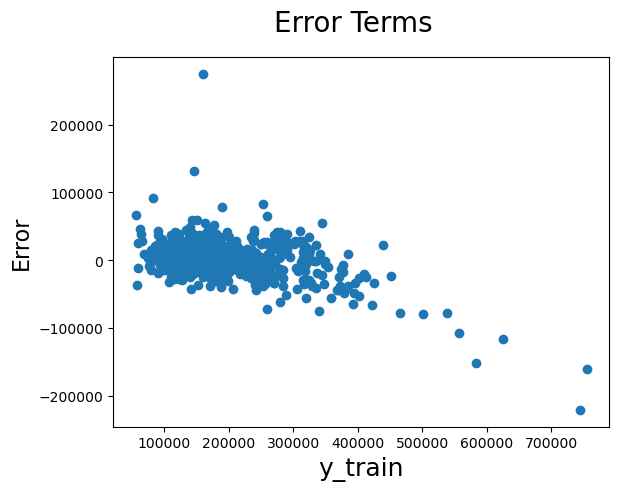

In [98]:
# Plotting the error terms to check for trend
fig = plt.figure()
plt.scatter(y_train, y_pred_train-y_train)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('y_train', fontsize = 18)                                      
plt.ylabel('Error', fontsize = 16) 

Text(0.5, 0, 'Errors')

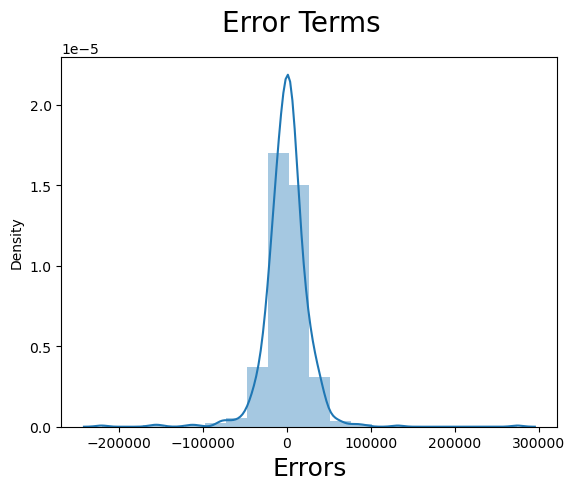

In [99]:
# Displaying the density plot (Histogram) for the error terms
import matplotlib.pyplot as plt
fig = plt.figure()
sns.distplot((y_pred_train-y_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)            

The error terms are normally distributed around 0.0 so we can accept this regression model.